`!pip install schemdraw[matplotlib]`

based on <https://schemdraw.readthedocs.io/en/latest/gallery/flowcharting.html>

In [1]:
import schemdraw
from schemdraw import flow

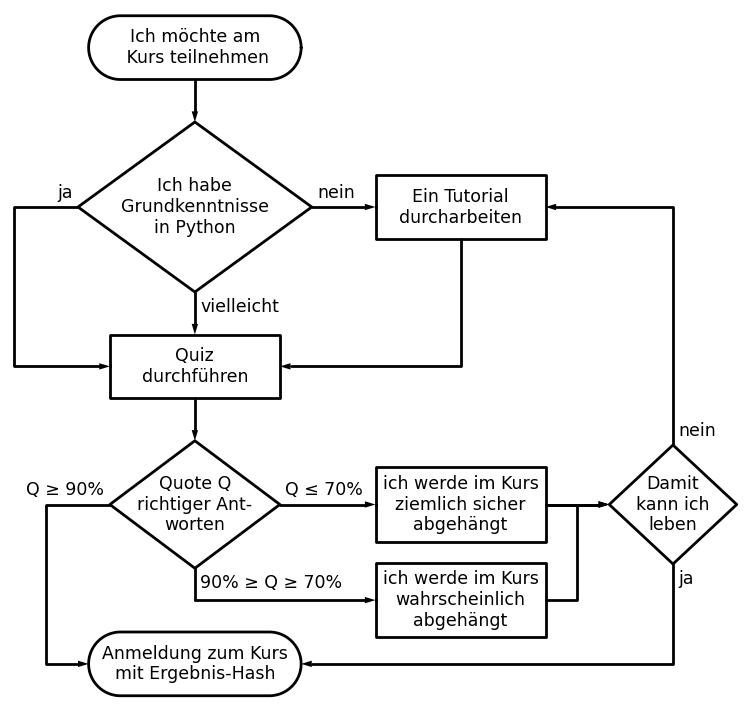

In [2]:
# Hinweis: `:=` ist der Walross-Operator
# (engl. "walrus operator", offiziell "assignment expression", = Zuweisung und Rückgabewert in einem)

with schemdraw.Drawing() as d:
    d += flow.Start(w=5, h=1.5).label('Ich möchte am\n Kurs teilnehmen')
    d += flow.Arrow().down(d.unit/3)
    d += (
        gk := flow.Decision(w=5.5, h=4, W="ja", S='vielleicht', E="nein")
          .label("Ich habe\nGrundkenntnisse\nin Python")
    )
    
    d += flow.Arrow().down(d.unit/3)
    d += (quiz := flow.Box(w=4, h=1.5).label('Quiz\ndurchführen'))
    d += flow.Wire('c', k=-1.5, arrow='->').at(gk.W).to(quiz.W)
    

    d += flow.Arrow().right(d.unit/2).at(gk.E)
    d += (lernen := flow.Box(w=4, h=1.5).anchor('W').label('Ein Tutorial\ndurcharbeiten'))
    d += flow.Wire('|-', k=-1.5, arrow='->').at(lernen.S).to(quiz.E)
    d += flow.Arrow().down(d.unit/3).at(quiz.S)
    d += (
        erfolg := flow.Decision(w=4, h=3, W=r"Q ≥ 90%", S=r"90% ≥ Q ≥ 70%", E="Q ≤ 70%")
          .label("Quote Q\nrichtiger Ant-\nworten")
    )
    d += flow.Arrow().right(d.unit*.75).at(erfolg.E)
    d += (
        empfehlung1 := flow.Box(w=4, h=1.75).anchor('W')
        .label("ich werde im Kurs\nziemlich sicher\nabgehängt")
    )
    
    d += (
        leiden := flow.Decision(w=3, h=2.8, N="nein", S="ja")
          .label("Damit\nkann ich\nleben")
          .at((empfehlung1.E.x + 1.5, erfolg.W.y))
    )
    
    d += flow.Wire('-',arrow='->').at(empfehlung1.E).to(leiden.W)
    d += flow.Wire('-',arrow='->').at(empfehlung1.E).to(leiden.W)
    d += flow.Line().down(d.unit/4).at(erfolg.S)
    d += flow.Arrow().right().tox(empfehlung1.W)
    d += (
        empfehlung2 := flow.Box(w=4, h=1.75).anchor('W')
        .label("ich werde im Kurs\nwahrscheinlich\nabgehängt")
    )
    d += flow.Wire('z', k=.75, arrow='->').at(empfehlung2.E).to(leiden.W)
    
    d += (
        ende := flow.Terminal(w=5, h=1.5)
        .label("Anmeldung zum Kurs\nmit Ergebnis-Hash").at((0, erfolg.S.y - 1.5))
    )
    d += flow.Wire('c', k=-1.5, arrow='->').at(erfolg.W).to(ende.W)
    d += flow.Wire('|-', k=-1.5, arrow='->').at(leiden.N).to(lernen.E)
    d += flow.Wire('|-', k=-1.5, arrow='->').at(leiden.S).to(ende.E)
    # d.save('teilnahmevoraussetzungen.svg')

Wir haben das Quiz gemacht, damit Ihr Euch einschätzen könnt. Wenn das Quiz für Euch leicht ist, dann seid Ihr auf einem guten Stand für den Kurs. Wenn es schwer ist, dann ist es sinnvoll, sich nocheinmal mit den Grundlagen zu beschäftigen. Wenn Ihr aber während des Kurses mal ein, zwei Fragen habt, von denen Ihr glaubt, Ihr müsstet sie eigentlich wissen, dann fragt gerne! Niemand weiß wirklich *alles*.

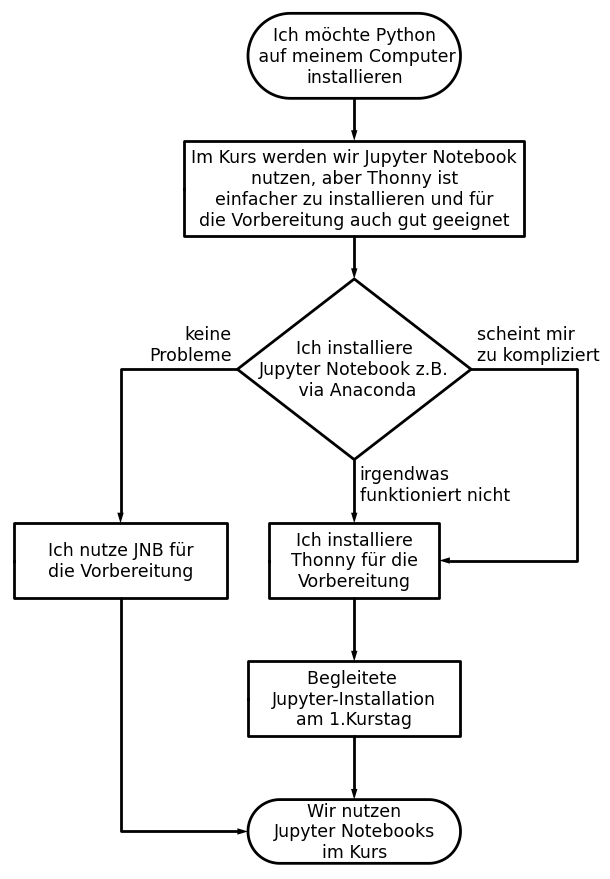

In [3]:
# Hinweis: `:=` ist der Walross-Operator ("walrus operator", Zuweisung und Rückgabewert in einem)

with schemdraw.Drawing() as d:
    d += flow.Start(w=5, h=2).label('Ich möchte Python\n auf meinem Computer\ninstallieren')
    d += flow.Arrow().down(d.unit/3)
    d += (
        info1 := flow.Box(w=8, h=2.25)
          .label(
              "Im Kurs werden wir Jupyter Notebook\n"
              "nutzen, aber Thonny ist\n"
              "einfacher zu installieren und für\n"
              "die Vorbereitung auch gut geeignet"
          )
    )
    d += flow.Arrow().down(d.unit/3)
    d += (
        install := flow.Decision(
            w=5.5, h=4.25,
            W="keine\nProbleme",
            S='irgendwas\nfunktioniert nicht',
            E="scheint mir\nzu kompliziert"
        ).label("Ich installiere\nJupyter Notebook z.B.\n via Anaconda")
    )
    
    d += flow.Arrow().down(d.unit/2)
    d += (thonny := flow.Box(w=4, h=1.75).label('Ich installiere\nThonny für die\nVorbereitung'))
    
    d += flow.Arrow().down(d.unit/2)
    d += (flow.Box(w=5, h=1.75).label('Begleitete \nJupyter-Installation\nam 1.Kurstag'))
    
    
    d += flow.Arrow().down(d.unit/2)
    d += (
        ende := flow.Terminal(w=5, h=1.5)
        .label("Wir nutzen\nJupyter Notebooks\nim Kurs")
    )
    
    d += flow.Wire('c', k=2.5, arrow='->').at(install.E).to(thonny.E)
    
    d += (jnb := flow.Box(w=5, h=1.75)
          .label("Ich nutze JNB für\ndie Vorbereitung")
          .at((thonny.N.x - 3, thonny.W.y))
     )
    d += flow.Wire('-|', k=1.5, arrow='->').at(install.W).to(jnb.N)
    d += flow.Wire('|-', k=1.5, arrow='->').at(jnb.S).to(ende.W)
    # d.save('installation.svg')

In [4]:
!ls

flussdiagramme.ipynb  pyerk-dependencies.ipynb	    web.svg
installation.svg      teilnahmevoraussetzungen.svg
